# 1. Introduction to Pandas

## Learning objectives
- Understand the nature of Pandas Series and DataFrames.
- Know how to index and slice Pandas DataFrames columns to return DataFrames and Series.
- Know how to make new columns from existing columns.
- Understand the difference between None and np.nan.
- How to drop rows and columns with .drop().
- How to use .loc[] and .iloc[].
- Understand conditional selection and boolean masking.
- Know how to use .set_index() and .reset_index().

## Pandas

- Pandas, along with Numpy, is probably the most important library for Python Data Science.
- The main Pandas object is a DataFrame, there are also Series but we will not really cover them here.
- Best way to think of Pandas is as a very powerful version of Excel, and a DataFrame is like a spreadsheet.
- DataFrames have rows and columns.
- Each column of a DataFrame object is a Pandas Series object.
- A Pandas Series object is built from a Numpy array (Series is like array but with labelled index).
- We import using the following syntax by convention:

In [2]:
import pandas as pd

In [252]:
# do not worry about this, here we are just reading in a dataset to demonstrate operations
sf_sal = pd.read_csv('Salaries.csv')

In [260]:
sf_sal[["BasePay","OvertimePay"]]
sf_sal.iloc[:, []]
#sf_sal.iloc[:, list(range(len(sf_sal.columns)))]
sf_sal.iloc[:, list(range(len(sf_sal.columns)))[:-1]]
sf_sal.loc[:, ["Id", "EmployeeName", "JobTitle"]]


pandas.core.series.Series

In [261]:
##sf_sal.drop("Id", inplace=True)  
#sf_sal.drop("Id", axis=1, inplace=True)
##sf_sal.drop("Id", axis=0, inplace=True)
##sf_sal.Id = sf_sal.drop("Id", axis="columns")
##sf_sal.drop("Id", axis="columns")
##sf_sal.drop("A", axis=0)
sf_sal
#sf_sal = sf_sal.drop("Id",axis=1)

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

In [81]:
sf_sal.tail(1)
#sf_sal.head(-1)
sf_sal.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
671,672,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN
672,673,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN
673,674,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN
674,675,ELIZABETH AGUILAR-TARCHI,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.17,0.00,3537.11,NaN,180393.28,180393.28,2011,NaN,San Francisco,NaN
675,676,JULIAN NG,SERGEANT III (POLICE DEPARTMENT),130457.76,43793.11,6061.80,NaN,180312.67,180312.67,2011,NaN,San Francisco,NaN


In [90]:
#sf_sal[sf_sal > 5]
sf_sal[~(sf_sal["Id"] <= 5)]
sf_sal[sf_sal["Id"] > 5]
sf_sal[sf_sal.Id > 5]
#sf_sal.greater("Id", 5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,672,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN
672,673,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN
673,674,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN
674,675,ELIZABETH AGUILAR-TARCHI,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.17,0.00,3537.11,NaN,180393.28,180393.28,2011,NaN,San Francisco,NaN


In [246]:
#10 So we have a DataFrame df with numerical data only. How to get `numpy` matrix from it?

import numpy
df=sf_sal[["Id"]]
type(df.values)
type(df.to_numpy())
#df.as_matrix()

numpy.ndarray

In [245]:
'''
11 Pandas `apply` function for `pd.Series` works across elements contained within it.

When we apply it on `pd.DataFrame` with multiple columns, the function gets a single row (see also `axis` parameter).

Given we have columns A, B, C (all concatenation) we would like to create a a new column D which fulfills the equation C + A + B. How can we do this?
'''

df=sf_sal[["Id","BasePay","OtherPay"]].head()
#df["D"] = df.apply(lambda row: row.sum())
#df["D"] = df.sum(axis=0)
#df.D = df.sum(axis=1)
df["D"] = df.apply(lambda row: row.Id + row.BasePay + row.OtherPay, axis=1)
df["D"] = df.apply(lambda row: row.sum(), axis=1)
df

,Id,BasePay,OtherPay,D
0,1,167411.18,400184.25,1135192.86
1,2,155966.02,137811.38,587558.80
2,3,212739.13,16452.60,458389.46
3,4,77916.00,198306.90,552453.80
4,5,134401.60,182234.59,633282.38


In [242]:
#12 We have multiple columns containing NaNs. What would be the way to fill those with mean value of each column so the original dataframe is modified?

import numpy
df.iloc[0:1,0:1]=numpy.NaN

# df.fillnan(df.mean())
#df.fillna(df.mean(axis=1))
# df.fillna("mean")
df.fillna(df.mean(), inplace=True)
#df.fillna(df.mean())
df

,Id,BasePay,OtherPay,D,"(Id, 4)"
0,3.5,167411.18,400184.25,567596.43,10
1,2.0,155966.02,137811.38,293779.40,10
2,3.0,212739.13,16452.60,229194.73,10
3,4.0,77916.00,198306.90,276226.90,10
4,5.0,134401.60,182234.59,316641.19,10


In [239]:
#13.How to get boolean array/matrix to detect where the NaNs are located?

import numpy
df.iloc[0:1,0:1]=numpy.NaN
df.isnull()
df.isna()
#df.isna(pd.NA)
#df.isnull(pd.NA)
pd.isnull(df)

,Id,BasePay,OtherPay,D,"(Id, 4)"
0,True,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [181]:
#14. How to group DataFrame df containing columns A, B, C, D by values contained in columns A and B and take the mean of those groups?
series=pd.Series([1, 1, 2, 3])
#series.nunique()
# series.unique()
# series.count()
# series.value_counts()

3

In [263]:
#16How to group DataFrame df containing columns A, B, C, D by values contained in columns A and B and take the mean of those groups?
#df.groupby(["Id", "BasePay"]).mean()
#df.groupby("D", "Id").apply(lambda value, row: value / len(row))

ValueError: No axis named Id for object type <class 'pandas.core.frame.DataFrame'>

In [237]:
#18Let's say we have grouped pandas dataframe like this: grouped = df.groupby("A"). How can we itereate over this group?

grouped = df.groupby("Id")
# for group in grouped:
#     print((group))

# while grouped:
#     print(1)

# for _, group in grouped:
#     print(_)
#     print(group)

# for group in grouped.iteritems():
#     print(group)



In [210]:
#20 How to concatenate two string columns A and B in DataFrame df and put the result in column C?

sf=sf_sal[["EmployeeName","JobTitle","Agency"]]
##sf.C = sf.Agency + sf.JobTitle
##sf["C"] = pd.cat(sf.EmployeeName, df.Agency)
#sf["C"] = sf.EmployeeName.str.cat(sf.Agency)
##sf['C'] = sf[['EmployeeName', 'Agency']].apply(lambda x : f'{x[0]}{x[1]}' axis=1)
sf["C"] = sf[["EmployeeName", "Agency"]].str.concat()
sf

AttributeError: 'DataFrame' object has no attribute 'str'

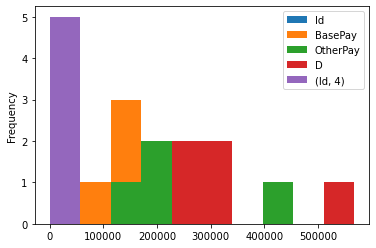

In [222]:
'''21
How to plot a histogram of DataFrame?This question is required. *
How to plot histogram of all column in pandas dataframe (named df) so it is shown as a single plot?
'''

df
df.plot.hist()
#df.plot.histogram()
#df.plot_hist()
#df.histogram()
#df.hist()

In [5]:
# again do not worry about this cell, it is just creating a list of 2-letter alphabetical codes

import string
alphabet = string.ascii_uppercase
alphabet

index_list = []

for first in alphabet:
    for second in alphabet:
            index_list.append(first + second)

In [6]:
print(index_list)

['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM', 'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CV', 'CW', 'CX', 'CY', 'CZ', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT', 'DU', 'DV', 'DW', 'DX', 'DY', 'DZ', 'EA', 'EB', 'EC', 'ED', 'EE', 'EF', 'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'EO', 'EP', 'EQ', 'ER', 'ES', 'ET', 'EU', 'EV', 'EW', 'EX', 'EY', 'EZ', 'FA', 'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FM', 'FN', 'FO', 'FP', 'FQ', 'FR', 'FS', 'FT', 'FU', 'FV', 'FW', 'FX', 'FY', 'FZ', 'GA', 'GB', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GJ', 'GK

In [15]:
sf_sal["Id"] = index_list
sf_sal.set_index("Id", inplace=True)
sf_sal

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
ZV,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN
ZW,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN
ZX,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN


## Selection and Indexing

- We use square brackets to index, primarily by columns.
- We can pass in a list of columns to select.
- Single bracket notation returns a Series, double bracket returns DataFrame.
- Suggest generally using double bracket unless a Series is required.

In [91]:
# single bracket returns Series, with name/length/dtype info
# bear in mind these can be obtained explicitly with methods

sf_sal["BasePay"]

Id
AA    167411.18
AB    155966.02
AC    212739.13
AD     77916.00
AE    134401.60
        ...    
ZV    176856.18
ZW    176856.18
ZX    176856.19
ZY    176856.17
ZZ    130457.76
Name: BasePay, Length: 676, dtype: float64

In [23]:
# double bracket returns DataFrame

sf_sal[["BasePay"]]

,BasePay
Id,
AA,167411.18
AB,155966.02
AC,212739.13
AD,77916.00
AE,134401.60
...,...
ZV,176856.18
ZW,176856.18
ZX,176856.19


In [24]:
# selecting multiple columns requires double brackets

sf_sal[["BasePay","TotalPay"]]

,BasePay,TotalPay
Id,,
AA,167411.18,567595.43
AB,155966.02,538909.28
AC,212739.13,335279.91
AD,77916.00,332343.61
AE,134401.60,326373.19
...,...,...
ZV,176856.18,180394.07
ZW,176856.18,180393.98
ZX,176856.19,180393.94


## Lambda/Anonymous Expressions with .apply() method

- The .apply() method takes in a function and returns a DataFrame or slice with the function applied to the members of that DataFrame or slice.
- Often, we may want to use .apply() without having to define a whole function to do; this is where lambda expressions come in.
- This is often useful for feature engineering: creating variables from other variables.
- When the function is __SIMPLE__, lambda expressions are useful: they are __NOT__ for __complex__ operations.
- They take the syntax:
    - lambda input : output (in terms of input)
    - e.g. to square --> lambda x:x\*\*2
- We use the example of obtaining a column of surnames from the column of names here:

In [29]:
# first must define function to find surname

def find_surname(x):
    # one space in surname
    # .split returns list of string split split on " " by default
    # Index 0 = first name, index 1 = surname
    return x.split()[1]


# pass in function without brackets to .apply()
# can make new column by doing operations on existing columns: feature engineering
# save new column by "indexing" using name of new column
sf_sal["Surname"] = sf_sal["EmployeeName"].apply(find_surname)

# check head to see if it worked
sf_sal.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname
Id,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER


In [30]:
# for a simple expression like this we can just use a lambda expression
sf_sal["Surname"] = sf_sal["EmployeeName"].apply(lambda x: x.split()[1])

# note that the outputs are the same
sf_sal.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname
Id,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER


### Exercise:
- Use what you have just learned about .apply() to find out how many Job Titles have the word 'police' in them.

In [44]:
# define function to find 'police' first

def find_police(x):
    return "POLICE" in x


# use apply to search for it in JobTitle
sf_sal["isPolice"] = sf_sal["JobTitle"].apply(find_police)

# CODE HERE
sf_sal

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice
Id,,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZV,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN,ADAMS,False
ZW,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN,SIMPSON,False
ZX,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN,LOEBS,False


In [45]:
# sum
sf_sal["isPolice"].sum()

139

## NoneType
- We must distinguish between None, NaN and 0 here.
- None has data type 'NoneType' and is therefore a value, and we can use this as a placeholder before adding values.
- 0 is an integer, and therefore a value, this shows that we have a response in the cell, but the response is 0.
- NaN stands for 'Not a Number' and so denotes a MISSING value, although it has the type float.
- We can see this clearly when we check the types of each:

In [46]:
type(None)

NoneType

In [47]:
type(0)

int

In [55]:
import numpy as np

type(np.nan)
np.nan + float("inf")

nan

## Adding and Removing Columns

In [56]:
# can create new column with single value inc. integer/string/NoneType

sf_sal["new col"] = None

sf_sal.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice,new col
Id,,,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False,None
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True,None
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True,None
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False,None
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False,None


In [59]:
# remove rows/columns by using .drop(), axis=0 for rows, axis=1 for columns
# not inplace by default, so output will show DataFrame with row/column dropped but will not actually remove it

sf_sal.drop(["AE", "AB"]) # axis=0, inplace=False by default

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice,new col
Id,,,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False,None
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True,None
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False,None
AF,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN,SULLIVAN,False,None
AG,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN,LEE,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZV,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN,ADAMS,False,None
ZW,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN,SIMPSON,False,None
ZX,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN,LOEBS,False,None


In [58]:
sf_sal

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice,new col
Id,,,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False,None
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True,None
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True,None
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False,None
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZV,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN,ADAMS,False,None
ZW,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN,SIMPSON,False,None
ZX,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN,LOEBS,False,None


In [60]:
sf_sal.drop("new col", axis=1, inplace=True)

sf_sal.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice
Id,,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False


## Loc and Iloc

In [61]:
# use .loc[] to select rows by row names and columns by column names

sf_sal.loc["AA"]

EmployeeName                                        NATHANIEL FORD
JobTitle            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay                                                     167411
OvertimePay                                                      0
OtherPay                                                    400184
Benefits                                                       NaN
TotalPay                                                    567595
TotalPayBenefits                                            567595
Year                                                          2011
Notes                                                          NaN
Agency                                               San Francisco
Status                                                         NaN
Surname                                                       FORD
isPolice                                                     False
Name: AA, dtype: object

In [63]:
# use .iloc[rows,columns] to select by index (underlying, starting from 0 as usual)

sf_sal.iloc[0]

EmployeeName                                        NATHANIEL FORD
JobTitle            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay                                                     167411
OvertimePay                                                      0
OtherPay                                                    400184
Benefits                                                       NaN
TotalPay                                                    567595
TotalPayBenefits                                            567595
Year                                                          2011
Notes                                                          NaN
Agency                                               San Francisco
Status                                                         NaN
Surname                                                       FORD
isPolice                                                     False
Name: AA, dtype: object

In [65]:
# use .loc[r,c] with row and column to select single value

sf_sal.loc["AL", "TotalPay"]

297608.92

In [66]:
# for subset of rows and columns, use lists of each within .loc[]
# can index out of order

sf_sal.loc[["AC", "CV", "BK"],["BasePay", "Surname", "Year"]]

,BasePay,Surname,Year
Id,,,
AC,212739.13,PARDINI,2011
CV,233357.28,MOYER,2011
BK,245124.44,CURRIN,2011


## Conditional Selection

In [67]:
# boolean condition like this returns boolean applied to each value in the column (like NumPy)

sf_sal["TotalPay"] > 300000

Id
AA     True
AB     True
AC     True
AD     True
AE     True
      ...  
ZV    False
ZW    False
ZX    False
ZY    False
ZZ    False
Name: TotalPay, Length: 676, dtype: bool

In [69]:
# can index DataFrame using this boolean to return only rows where this is true (called boolean masking)

mask = sf_sal["TotalPay"] > 300000

sf_sal_mask = sf_sal[mask]
sf_sal_mask

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice
Id,,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False
AF,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN,SULLIVAN,False
AG,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN,LEE,False
AH,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN,KUSHNER,False
AI,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN,MORRIS,False


In [70]:
# with a large DataFrame, much more memory efficient to index like this, to avoid saving a massive boolean Series
# to a variable for no reason

sf_sal[sf_sal["TotalPay"] > 300000]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice
Id,,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False
AF,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN,SULLIVAN,False
AG,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN,LEE,False
AH,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN,KUSHNER,False
AI,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN,MORRIS,False


In [71]:
# can further index on this selected DataFrame

sf_sal[sf_sal["TotalPay"] > 300000][["JobTitle", "Year", "TotalPay"]]

,JobTitle,Year,TotalPay
Id,,,
AA,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011,567595.43
AB,CAPTAIN III (POLICE DEPARTMENT),2011,538909.28
AC,CAPTAIN III (POLICE DEPARTMENT),2011,335279.91
AD,WIRE ROPE CABLE MAINTENANCE MECHANIC,2011,332343.61
AE,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",2011,326373.19
AF,ASSISTANT DEPUTY CHIEF II,2011,316285.74
AG,"BATTALION CHIEF, (FIRE DEPARTMENT)",2011,315981.05
AH,DEPUTY DIRECTOR OF INVESTMENTS,2011,307899.46
AI,"BATTALION CHIEF, (FIRE DEPARTMENT)",2011,303427.55


### Exercise:
- Use what you have just learned about conditional selection to find the following:   

1. A DataFrame containing the Name, Total Pay (with Benefits), Job Title and Base Pay of the employee named 'Albert Pardini'.

In [73]:
sf_sal

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice
Id,,,,,,,,,,,,,,
AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False
AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True
AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True
AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False
AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZV,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN,ADAMS,False
ZW,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN,SIMPSON,False
ZX,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN,LOEBS,False


In [94]:
# CODE HERE
# sf_sal[sf_sal["EmployeeName"] == "ALBERT PARDINI"][["EmployeeName", "TotalPayBenefits", "JobTitle", "BasePay"]]
sf_sal.loc["AC"][["JobTitle", "TotalPayBenefits", "BasePay", "EmployeeName"]]

JobTitle            CAPTAIN III (POLICE DEPARTMENT)
TotalPayBenefits                             335280
BasePay                                      212739
EmployeeName                         ALBERT PARDINI
Name: AC, dtype: object

2. The highest paid person in terms of Base Pay. (look up the .max() method)

In [100]:
# CODE HERE
sf_sal[sf_sal["BasePay"] == max(sf_sal["BasePay"])]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice
Id,,,,,,,,,,,,,,
AM,EDWARD HARRINGTON,EXECUTIVE CONTRACT EMPLOYEE,294580.02,0.0,0.0,NaN,294580.02,294580.02,2011,NaN,San Francisco,NaN,HARRINGTON,False


Use the .loc method with the .idxmax method to find:
- The lowest paid person in overall pay (with benefits). (look up the .min() method)

In [104]:
# CODE HERE
sf_sal.loc["ZZ"]
# sf_sal['TotalPayBenefits'].idxmin()

EmployeeName                               JULIAN NG
JobTitle            SERGEANT III (POLICE DEPARTMENT)
BasePay                                       130458
OvertimePay                                  43793.1
OtherPay                                      6061.8
Benefits                                         NaN
TotalPay                                      180313
TotalPayBenefits                              180313
Year                                            2011
Notes                                            NaN
Agency                                 San Francisco
Status                                           NaN
Surname                                           NG
isPolice                                        True
Name: ZZ, dtype: object

## Set and Reset Index

In [105]:
# use .reset_index() to revert to original numerical index (must specify inplace=True)

sf_sal.reset_index()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice
0,AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False
1,AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True
2,AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True
3,AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False
4,AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,ZV,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN,ADAMS,False
672,ZW,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN,SIMPSON,False
673,ZX,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN,LOEBS,False
674,ZY,ELIZABETH AGUILAR-TARCHI,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.17,0.00,3537.11,NaN,180393.28,180393.28,2011,NaN,San Francisco,NaN,AGUILAR-TARCHI,False


In [106]:
sf_sal.reset_index(inplace=True)

In [107]:
sf_sal

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Surname,isPolice
0,AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,FORD,False
1,AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,JIMENEZ,True
2,AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,PARDINI,True
3,AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHONG,False
4,AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,GARDNER,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,ZV,CHERYL ADAMS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.89,NaN,180394.07,180394.07,2011,NaN,San Francisco,NaN,ADAMS,False
672,ZW,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011,NaN,San Francisco,NaN,SIMPSON,False
673,ZX,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011,NaN,San Francisco,NaN,LOEBS,False
674,ZY,ELIZABETH AGUILAR-TARCHI,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.17,0.00,3537.11,NaN,180393.28,180393.28,2011,NaN,San Francisco,NaN,AGUILAR-TARCHI,False


In [ ]:
# use .set_index() to change index to a column

sf_sal.set_index("Id")

## Summary
You should now understand:
- The nature of Pandas Series and DataFrames.
- Conditional selection and boolean masking.
- The difference between None and np.nan.

You should now know how to manipulate Pandas DataFrames, including:
- Indexing and slicing to return DataFrames and Series
- How to use .loc[] and .iloc[].
- How to make new columns from existing columns.
- How to drop rows and columns with .drop().
- how to use .set_index() and .reset_index().

## Further reading
- More details on pandas operations are available in pandas documentation: https://pandas.pydata.org/docs/